In [1]:
#Data Analysis tools
import pandas as pd
import numpy as np

#Plotting tools
import seaborn as sns
import matplotlib.pyplot as plt

# Random choice
import random

# EDA Africa crises Data Set

## Context
This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx

The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

## Content
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

In [2]:
def crsis_value(crisis):
    '''
    This Fuction works to change the value banking crisis.
    crisis = 1
    no_crisis = 0
    '''
    if crisis  == 'crisis':
        return 1
    else:
        return 0

In [3]:
# Read the Data Set
africa_data = pd.read_csv('african_crises.csv', sep=',')
# Create a new column to convert banking crisis as value
africa_data['crisis_value'] = None
africa_data.crisis_value = africa_data.banking_crisis.apply(crsis_value)
africa_data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,crisis_value
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis,0


## Columns
- **case**: A number which denotes a specific country.

- **cc3**: A three letter country code.

- **country**: The name of the country.

- **year**: The year of the observation.

- **systemic_crisis**: "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.

- **exch_usd**: The exchange rate of the country vis-a-vis the USD.

- **domestic_debt_in_default**: "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year.

- **sovereign_external_debt_default**: "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year.

- **gdp_weighted_default**: The total debt in default vis-a-vis the GDP.

- **inflation_annual_cpi**: The annual CPI Inflation rate.

- **independence**: "0" means "no independence" and "1" means "independence".

- **currency_crises**: "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year.

- **inflation_crises**: "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year.

- **banking_crisis**: "no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year.


In [4]:
# Rounding of values
africa_data['exch_usd'] = africa_data.exch_usd.round(5)
africa_data['inflation_annual_cpi'] = africa_data.inflation_annual_cpi.round(5)

# Drop unnecessary columns
africa_data = africa_data.drop(['cc3'], axis=1)
africa_data = africa_data.drop(['case'], axis=1)
africa_data = africa_data.drop(['gdp_weighted_default'], axis=1)
africa_data.head()

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,crisis_value
0,Algeria,1870,1,0.05226,0,0,3.44146,0,0,0,crisis,1
1,Algeria,1871,0,0.05280,0,0,14.14914,0,0,0,no_crisis,0
2,Algeria,1872,0,0.05227,0,0,-3.71859,0,0,0,no_crisis,0
3,Algeria,1873,0,0.05168,0,0,11.20390,0,0,0,no_crisis,0
4,Algeria,1874,0,0.05131,0,0,-3.84856,0,0,0,no_crisis,0


# Univariate Analysis

In [5]:
# Data size
data_shape = africa_data.shape
print("Number of observations: {}, Number of columns: {}".format(data_shape[0], data_shape[1]))

Number of observations: 1059, Number of columns: 12


In [6]:
# Data info
africa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 12 columns):
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
crisis_value                       1059 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 99.4+ KB


In [7]:
# List of the countries
unique_countries = africa_data['country'].unique().tolist()
unique_countries

['Algeria',
 'Angola',
 'Central African Republic',
 'Ivory Coast',
 'Egypt',
 'Kenya',
 'Mauritius',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tunisia',
 'Zambia',
 'Zimbabwe']

In [8]:
# Countries to study
africa_data['country'].drop_duplicates()

0                       Algeria
85                       Angola
162    Central African Republic
220                 Ivory Coast
283                       Egypt
438                       Kenya
505                   Mauritius
573                     Morocco
648                     Nigeria
708                South Africa
822                     Tunisia
897                      Zambia
969                    Zimbabwe
Name: country, dtype: object

In [9]:
# Years to study
np.array(africa_data['year'].drop_duplicates())

array([1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880,
       1881, 1882, 1883, 1884, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1962, 1963, 1964, 1965, 1966, 1967, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1885, 1886,
       1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897,
       1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 19

In [10]:
# Data Characteristics
africa_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1059.0,1967.767705,33.530632,1860.00000,1951.00000,1973.00000,1994.00000,2.014000e+03
systemic_crisis,1059.0,0.077432,0.267401,0.00000,0.00000,0.00000,0.00000,1.000000e+00
exch_usd,1059.0,43.140831,111.475380,0.00000,0.19535,0.86840,8.46275,7.443061e+02
domestic_debt_in_default,1059.0,0.039660,0.195251,0.00000,0.00000,0.00000,0.00000,1.000000e+00
sovereign_external_debt_default,1059.0,0.152975,0.360133,0.00000,0.00000,0.00000,0.00000,1.000000e+00
inflation_annual_cpi,1059.0,20848.892444,675727.429176,-28.50214,2.08616,5.76233,11.64405,2.198970e+07
independence,1059.0,0.776204,0.416984,0.00000,1.00000,1.00000,1.00000,1.000000e+00
currency_crises,1059.0,0.128423,0.334718,0.00000,0.00000,0.00000,0.00000,1.000000e+00
inflation_crises,1059.0,0.129367,0.335765,0.00000,0.00000,0.00000,0.00000,1.000000e+00
crisis_value,1059.0,0.088763,0.284536,0.00000,0.00000,0.00000,0.00000,1.000000e+00


In [11]:
# Null Values
africa_data.isnull().sum()

country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
crisis_value                       0
dtype: int64

In [12]:
# Frequency from crisis value
africa_data.country.value_counts() 

Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Tunisia                      75
Morocco                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: country, dtype: int64

## Count 
- How many observations were made in each country
- How many crisis type were there in all country 

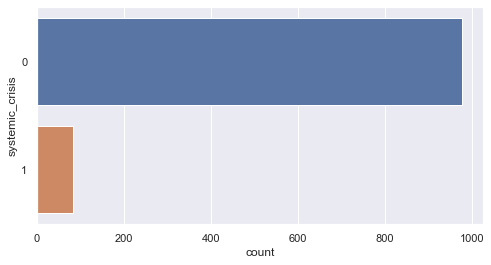

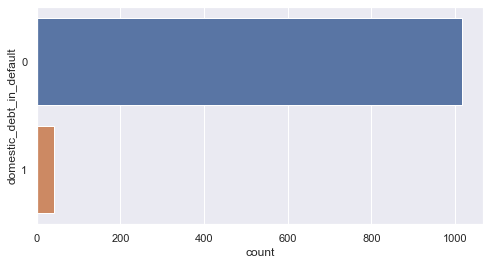

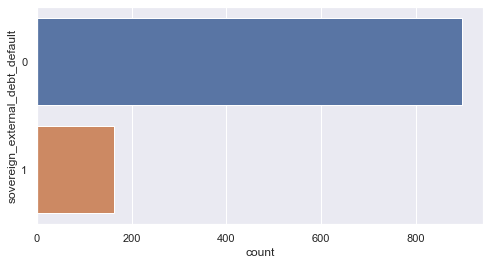

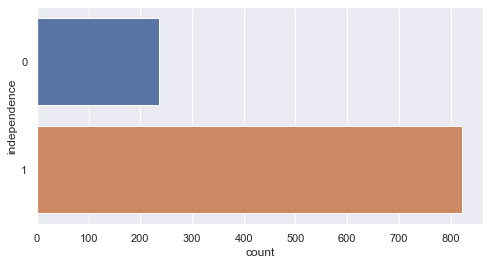

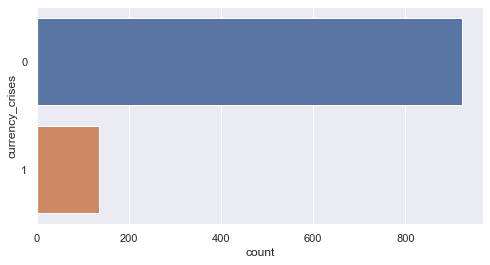

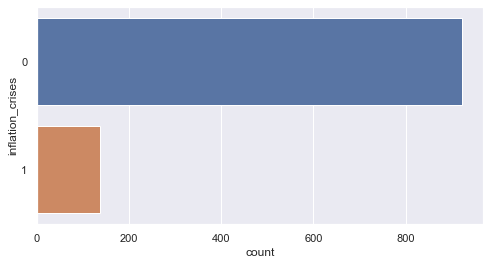

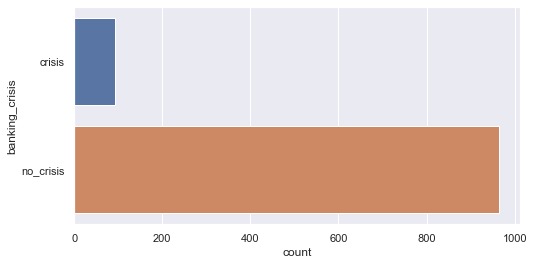

In [22]:
# List of columns from africa data
list_columns = list(africa_data.columns.unique())
# Elimination of columns 
list_columns.remove('year')
list_columns.remove('exch_usd')
list_columns.remove('inflation_annual_cpi')
list_columns.remove('crisis_value')
list_columns.remove('country')
for column in list_columns:
    f, ax = plt.subplots(figsize=(8, 4))
    sns.countplot(y=column , data=africa_data);
    plt.savefig(f'count_{column}.png')
    plt.show()

# Multivariate Analysis

## Analysis of how many crises were in each year in each country after the independence of the country.

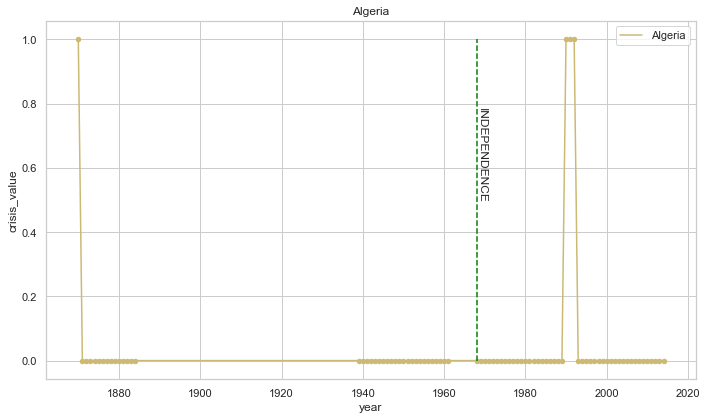

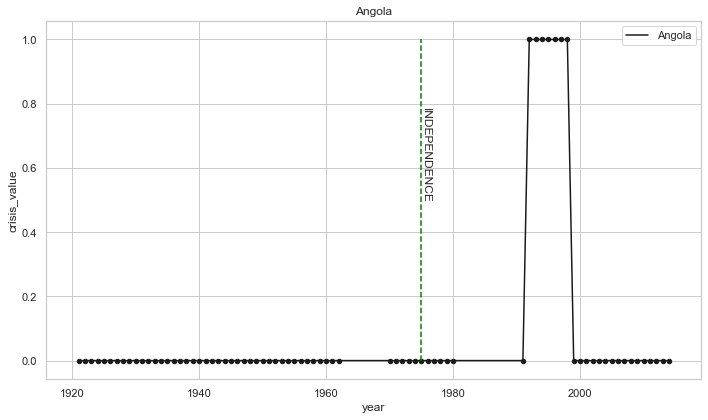

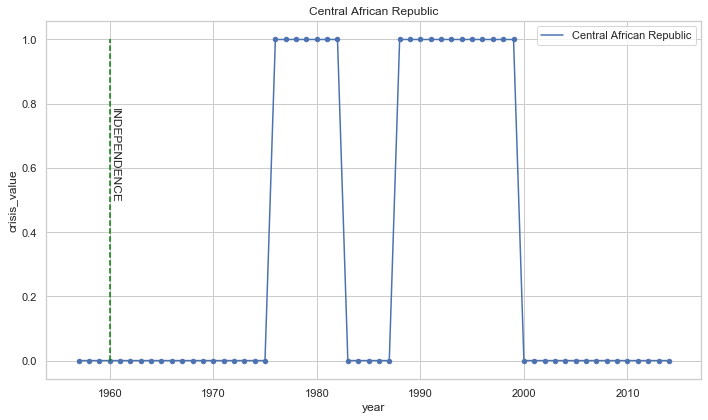

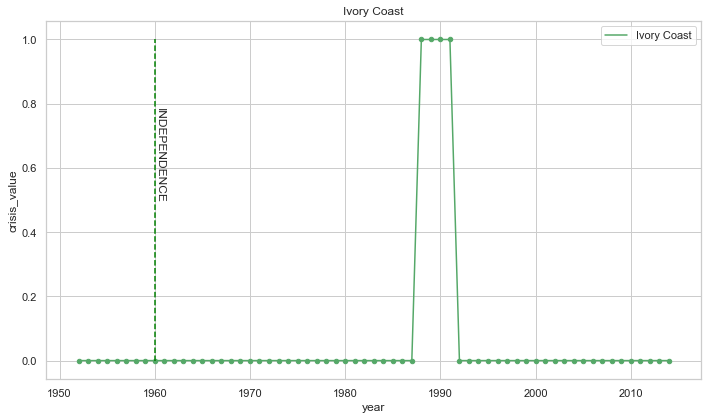

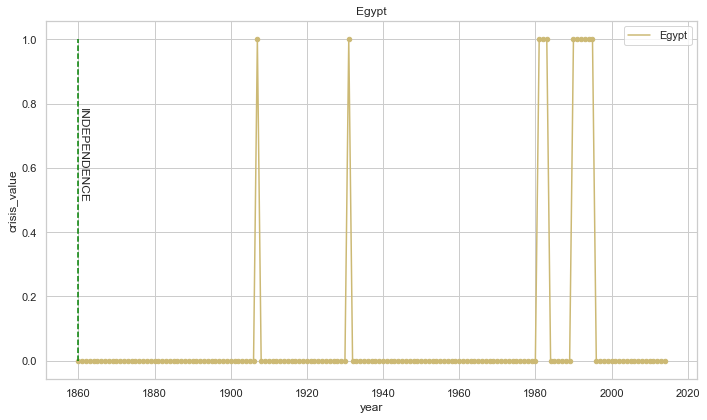

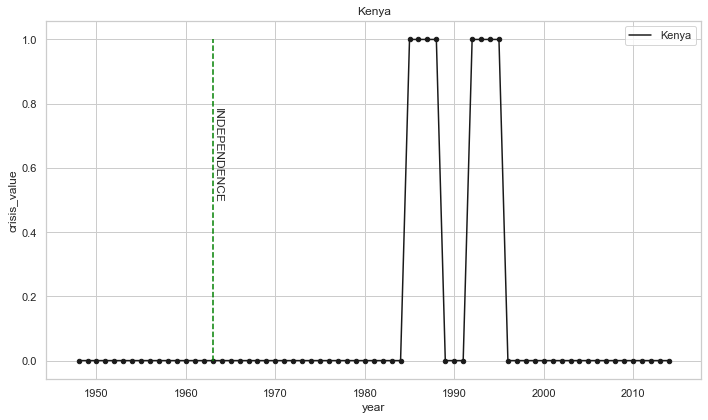

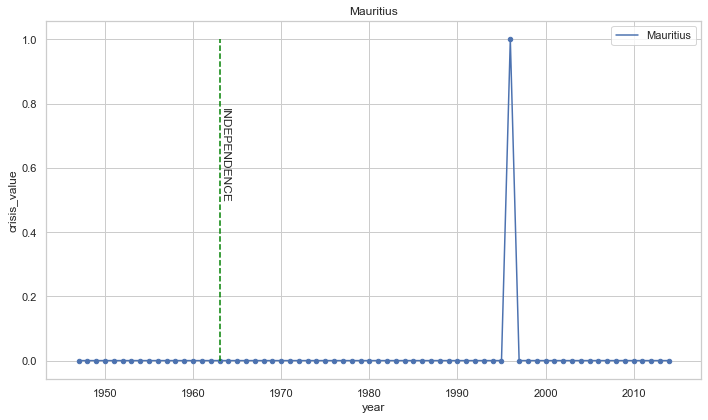

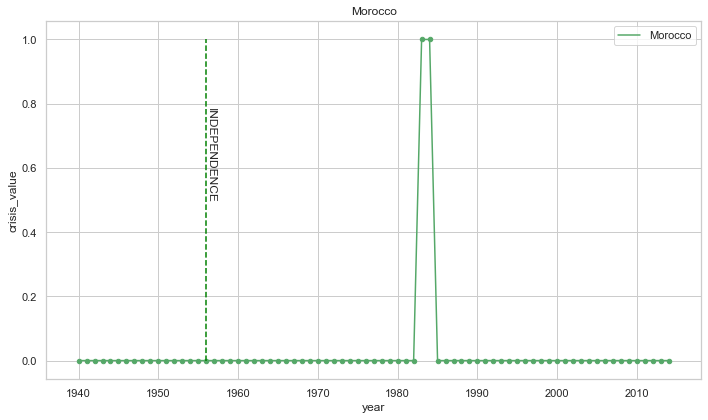

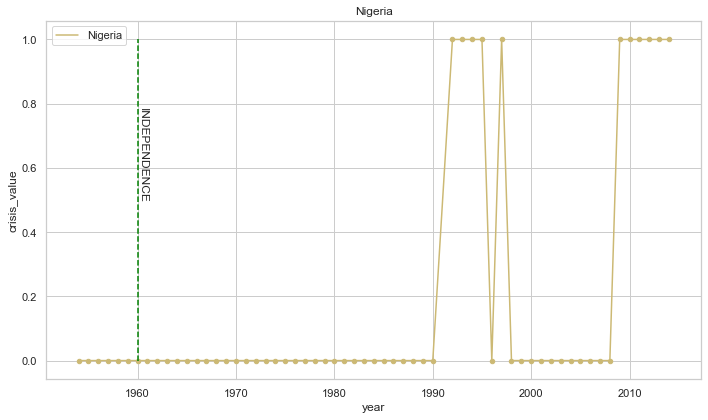

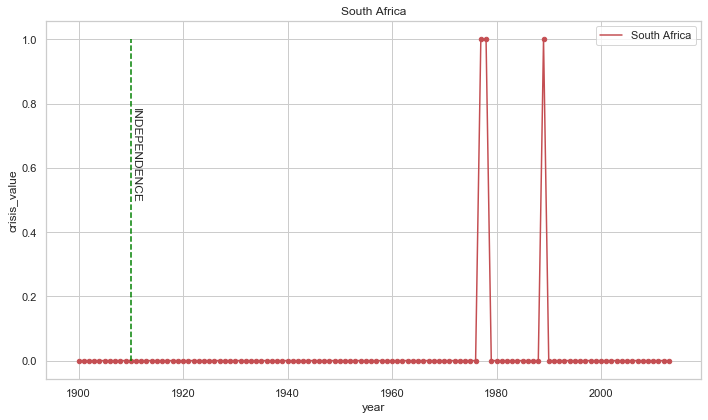

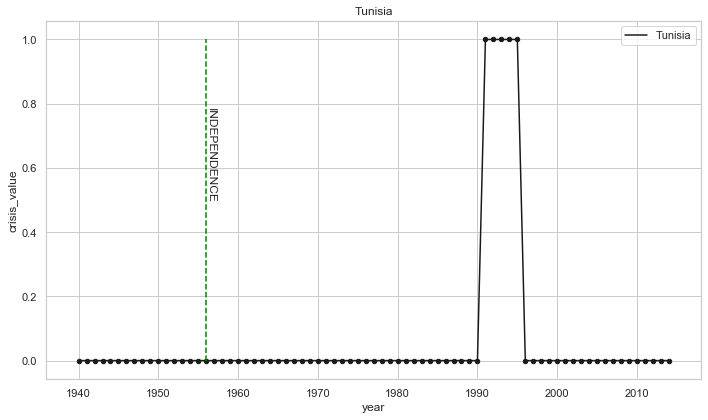

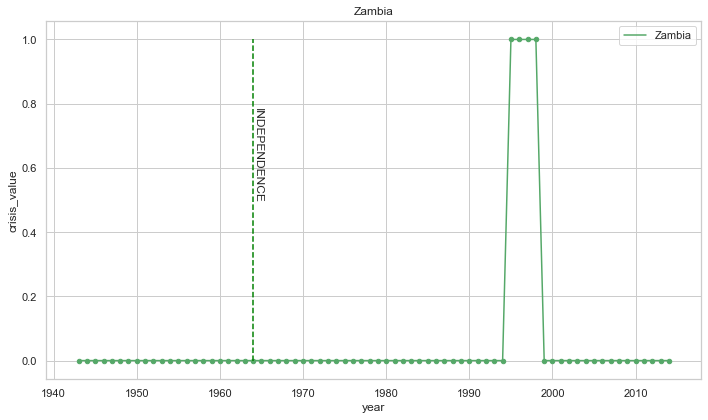

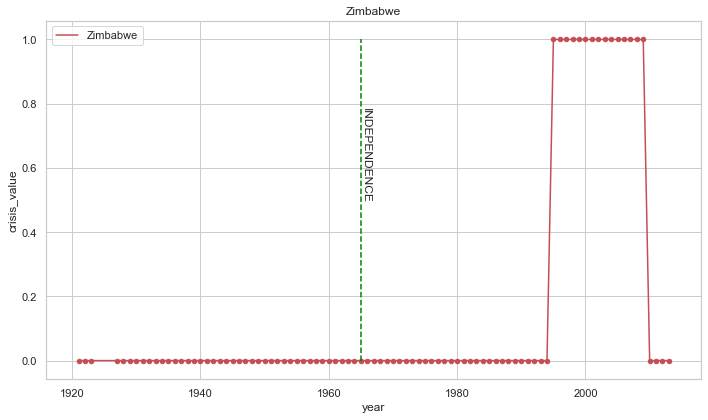

In [24]:
# The background color
sns.set(style='whitegrid')
# Figure size 
plt.rcParams['figure.figsize'] = (10,6)

for country in unique_countries:
    # Choice a random color 
    my_colors = random.choice(['b', 'r', 'g', 'y', 'k'])
    # Plot a line with the values from x(year) and y(crisis_value) 
    sns.lineplot(africa_data[africa_data.country == country]['year'],
                 africa_data[africa_data.country == country]['crisis_value'],
                 label = country,
                 color = my_colors)
    # Plot the points where there is a data (peaks of the lines)
    plt.scatter(africa_data[africa_data.country == country]['year'],
                africa_data[africa_data.country == country]['crisis_value'],
                color=my_colors,
                s = 20)
    # Plot a vertical line where start the independence of the country 
    plt.plot([africa_data[(africa_data.country == country)&(africa_data.independence == 1)]['year'].min(),
              africa_data[(africa_data.country == country)&(africa_data.independence == 1)]['year'].min()],
             [0,africa_data[(africa_data.country == country)]['crisis_value'].max()],
             color='green',
             linestyle='--')
    # Plot a text in the middle near the vertical line where start the independence of the country
    plt.text(africa_data[(africa_data.country == country)&(africa_data.independence == 1)]['year'].min(),
             africa_data[(africa_data.country == country)]['crisis_value'].max()/2,
             'INDEPENDENCE',
             rotation=-90)
    plt.title(country)
    # Adjustment in graphics separation
    plt.tight_layout()
    plt.savefig(f'crisis_{country}.png')
    plt.show()

## Analysis of the exchange rate of the country vis-a-vis the USD after the independence of the country.

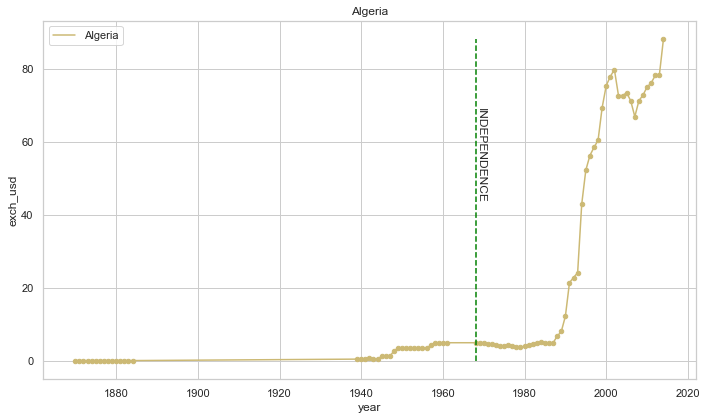

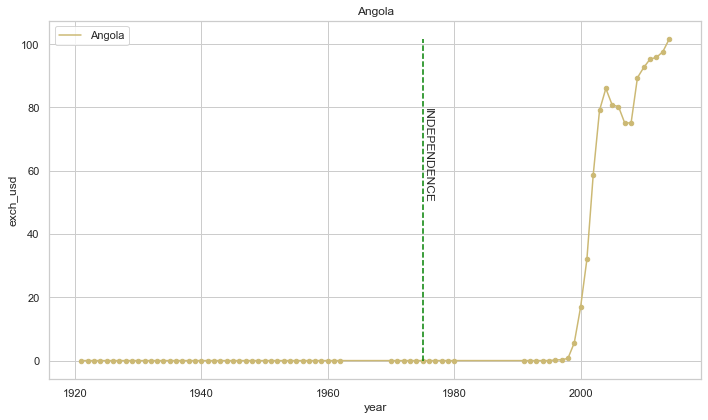

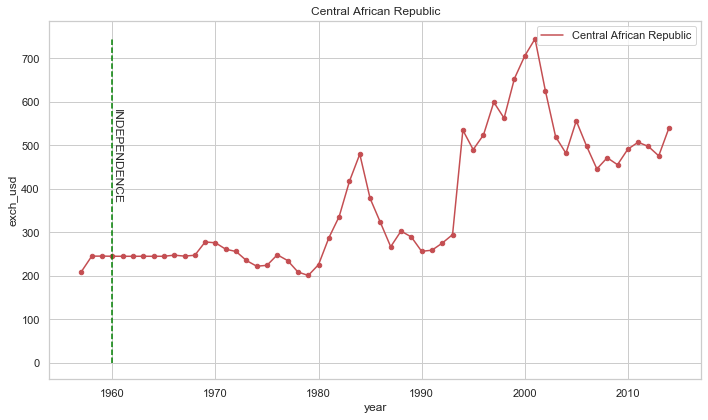

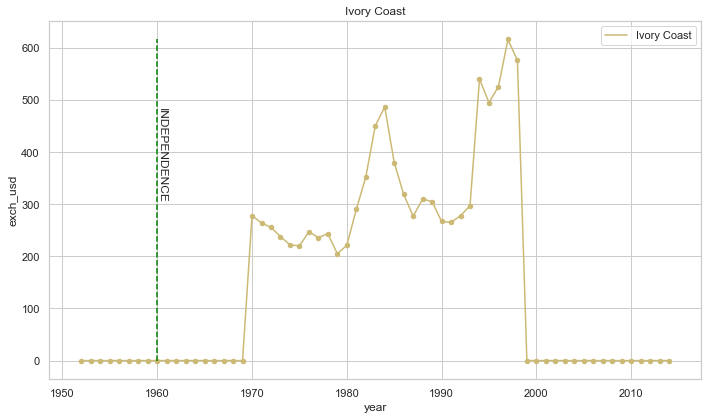

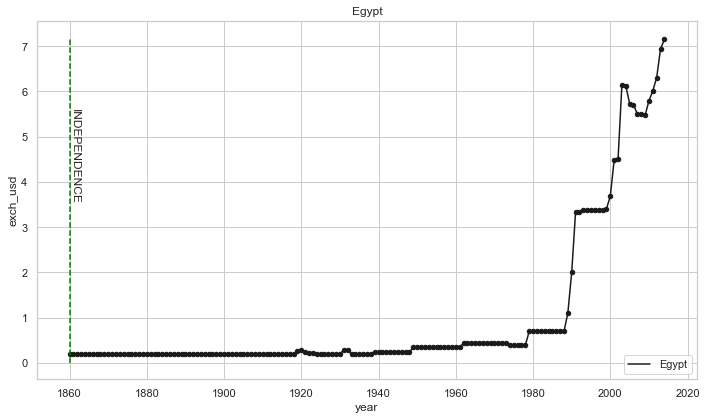

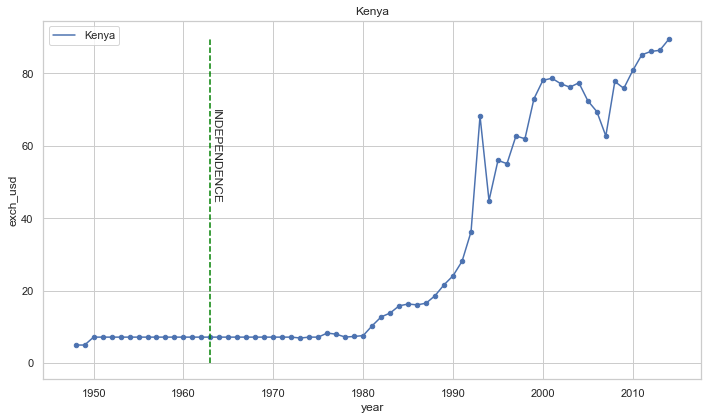

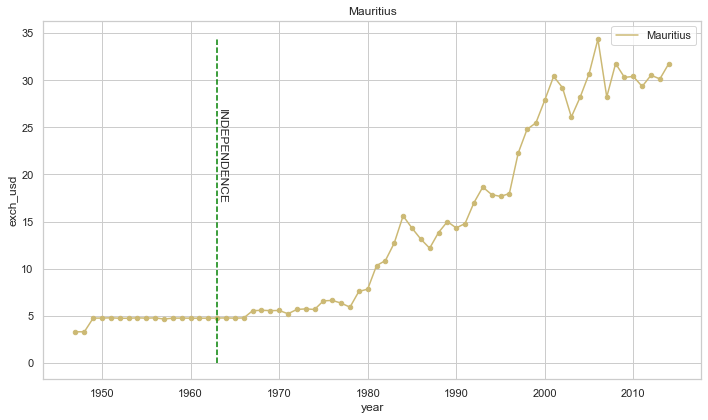

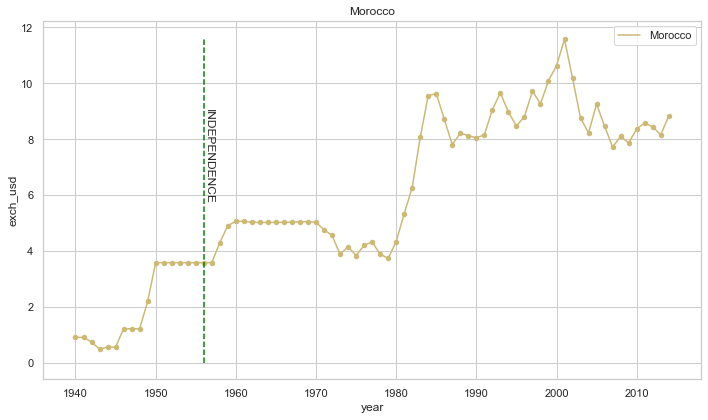

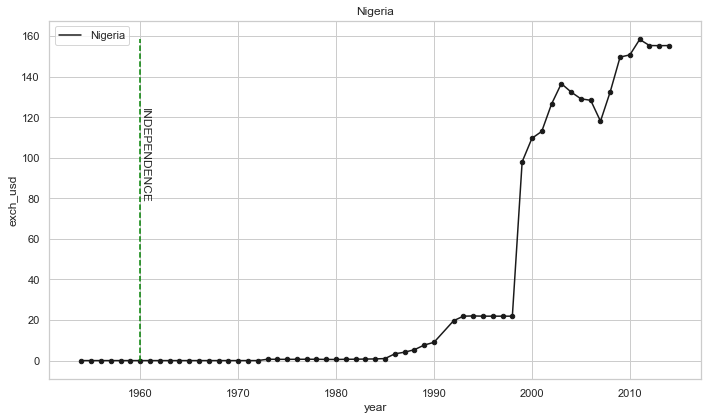

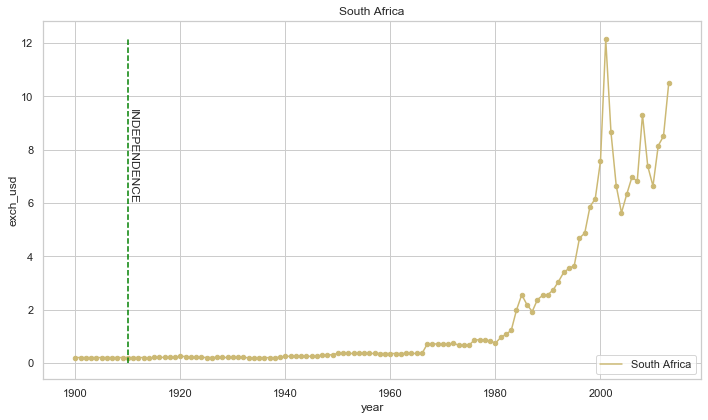

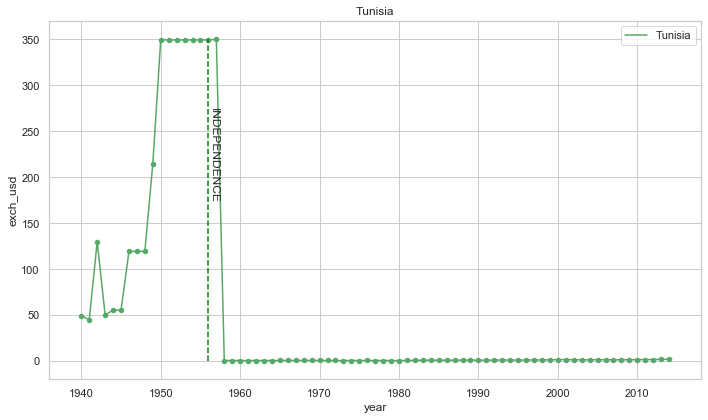

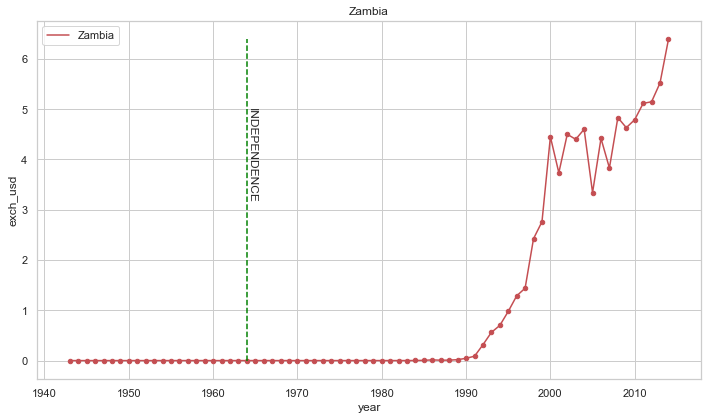

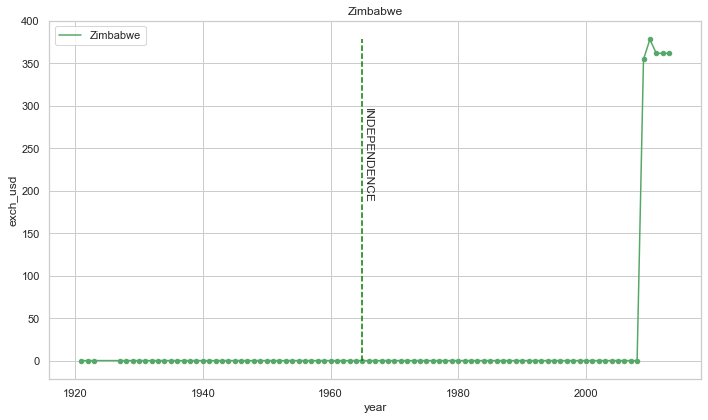

In [25]:
# The background color
sns.set(style='whitegrid')
# Figure size 
plt.rcParams['figure.figsize'] = (10,6)

for country in unique_countries:
    my_colors = random.choice(['b', 'r', 'g', 'y', 'k'])
    # Plot a line with the values from x(year) and y(exch_usd) 
    sns.lineplot(africa_data[africa_data.country == country]['year'],
                 africa_data[africa_data.country == country]['exch_usd'],
                 label = country,
                 color = my_colors)
    # Plot the points where there is a data (peaks of the lines)
    plt.scatter(africa_data[africa_data.country == country]['year'],
                africa_data[africa_data.country == country]['exch_usd'],
                color=my_colors,
                s = 20)
    # Plot a vertical line where start the independence of the country 
    plt.plot([africa_data[(africa_data.country == country)&(africa_data.independence == 1)]['year'].min(),
              africa_data[(africa_data.country == country)&(africa_data.independence == 1)]['year'].min()],
             [0,africa_data[(africa_data.country == country)]['exch_usd'].max()],
             color='green',
             linestyle='--')
    # Plot a text in the middle near the vertical line where start the independence of the country
    plt.text(africa_data[(africa_data.country == country)&(africa_data.independence == 1)]['year'].min(),
             africa_data[(africa_data.country == country)]['exch_usd'].max()/2,
             'INDEPENDENCE',
             rotation=-90)
    plt.title(country)
    # Adjustment in graphics separation
    plt.tight_layout()
    plt.savefig(f'exch_usd_{country}.png')
    plt.show()

## Analysis of the annual CPI Inflation rate after the independence of the country 

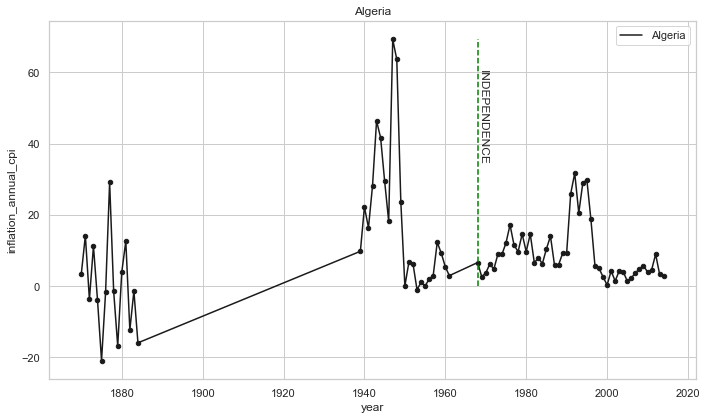

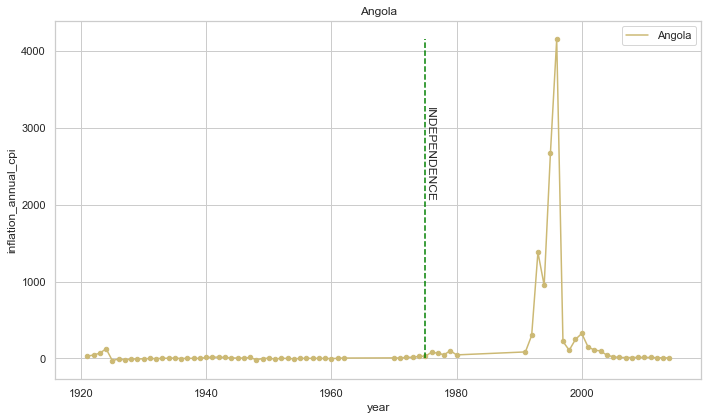

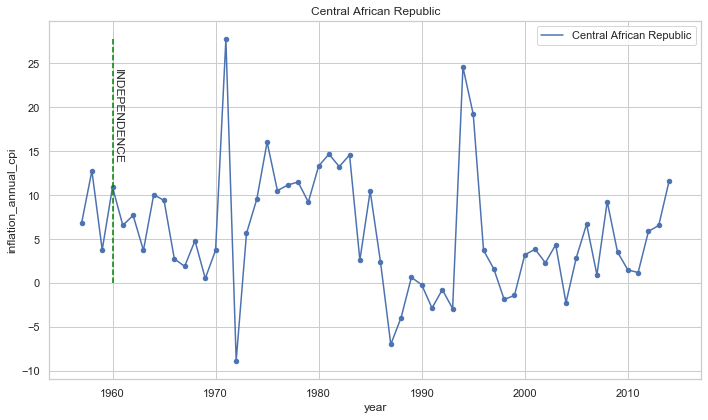

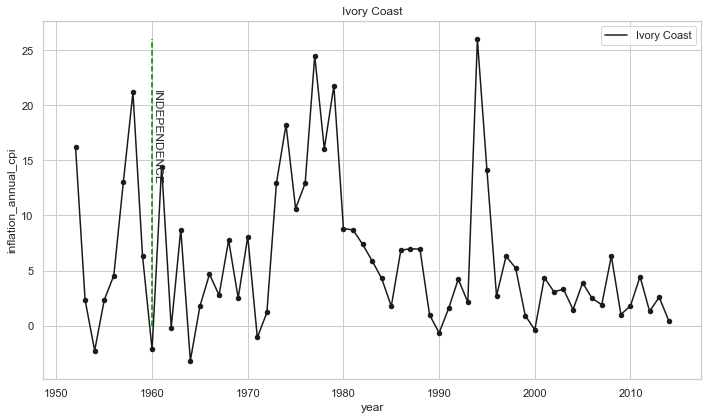

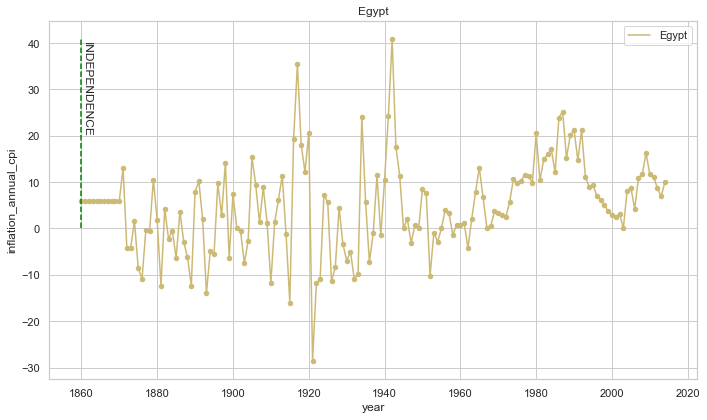

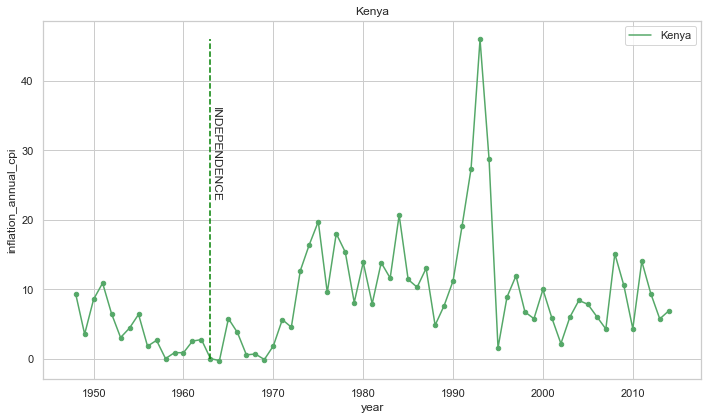

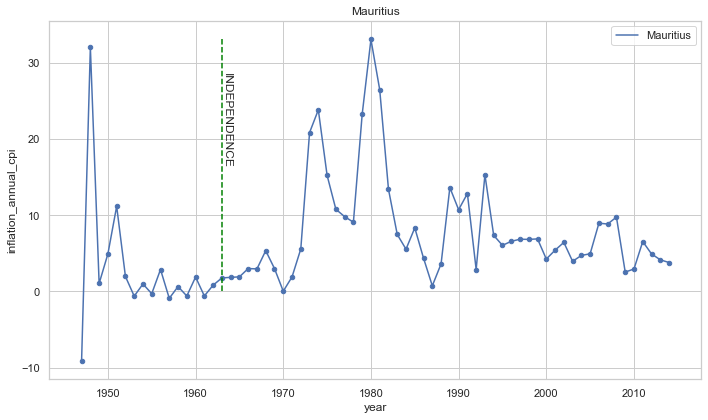

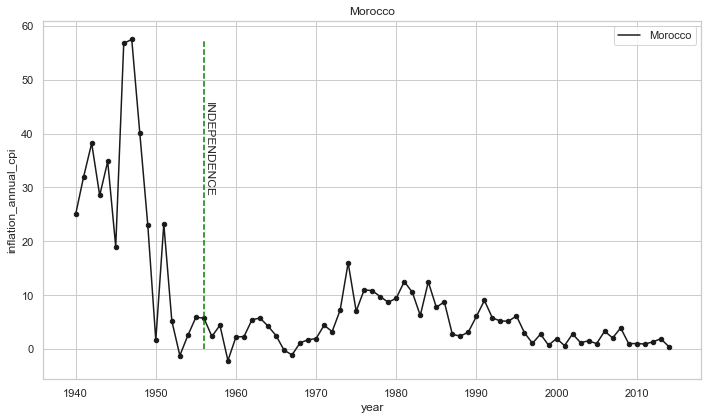

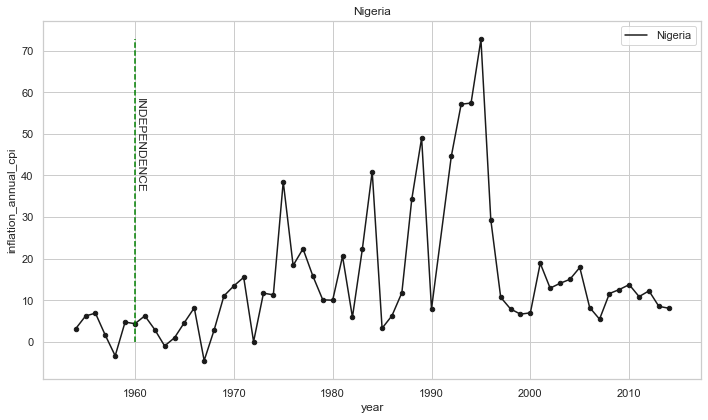

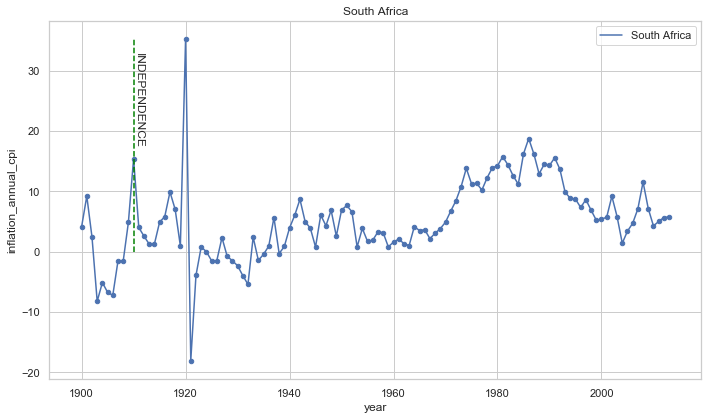

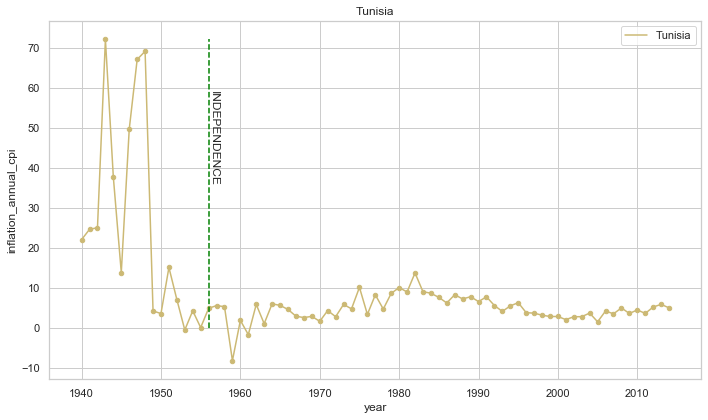

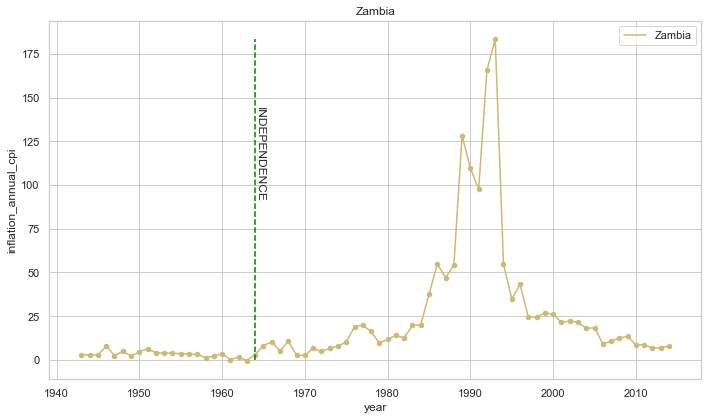

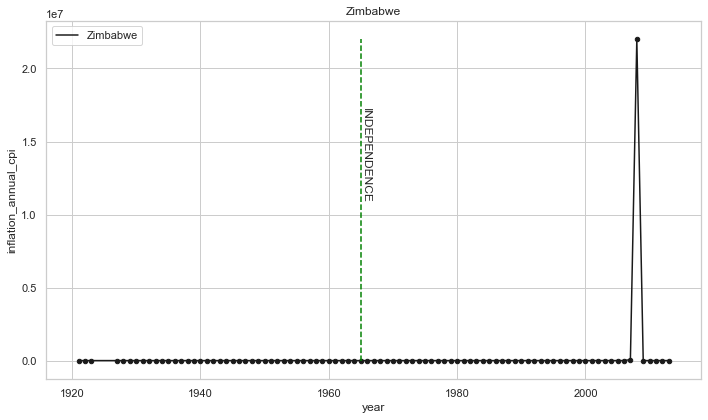

In [26]:
# The background color
sns.set(style='whitegrid')
# Figure size 
plt.rcParams['figure.figsize'] = (10,6)

for country in unique_countries:
    my_colors = random.choice(['b', 'r', 'g', 'y', 'k'])
    # Plot a line with the values from x(year) and y(inflation_annual_cpi) 
    sns.lineplot(africa_data[africa_data.country == country]['year'],
                 africa_data[africa_data.country == country]['inflation_annual_cpi'],
                 label = country,
                 color = my_colors)
    # Plot the points where there is a data (peaks of the lines)
    plt.scatter(africa_data[africa_data.country == country]['year'],
                africa_data[africa_data.country == country]['inflation_annual_cpi'],
                color=my_colors,
                s = 20)
    # Plot a vertical line where start the independence of the country 
    plt.plot([africa_data[(africa_data.country == country)&(africa_data.independence == 1)]['year'].min(),
              africa_data[(africa_data.country == country)&(africa_data.independence == 1)]['year'].min()],
             [0,africa_data[(africa_data.country == country)]['inflation_annual_cpi'].max()],
             color='green',
             linestyle='--')
    # Plot a text in the middle near the vertical line where start the independence of the country
    plt.text(africa_data[(africa_data.country == country)&(africa_data.independence == 1)]['year'].min(),
             africa_data[(africa_data.country == country)]['inflation_annual_cpi'].max()/2,
             'INDEPENDENCE',
             rotation=-90)
    plt.title(country)
    # Adjustment in graphics separation
    plt.tight_layout()
    plt.savefig(f'inflation_annual_cpi_{country}.png')
    plt.show()

## Analysis of the type crisis in each country and how many crisis the country had in total.

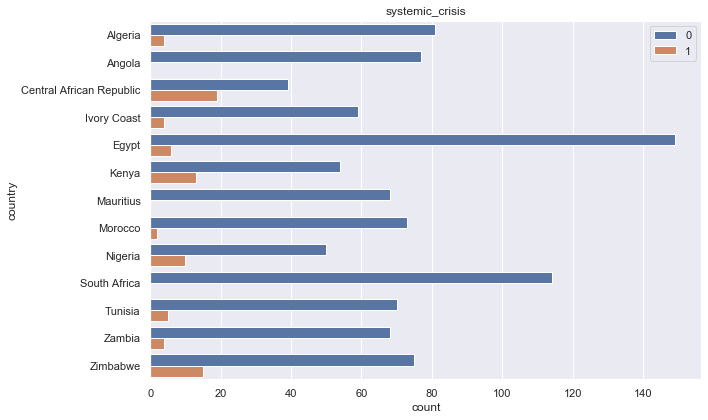

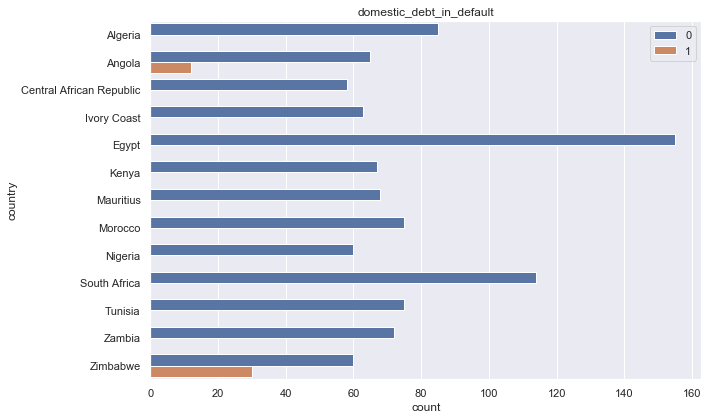

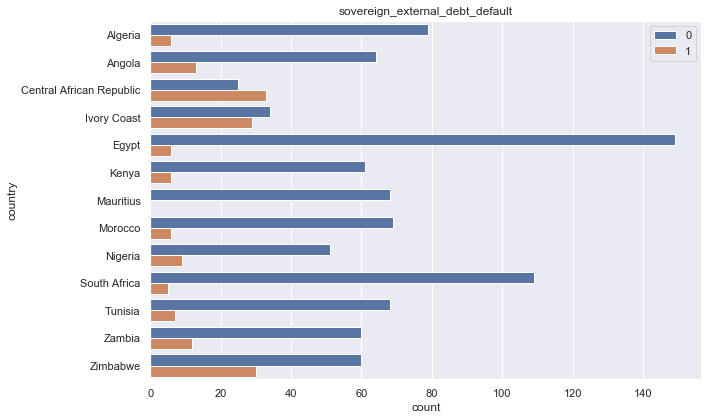

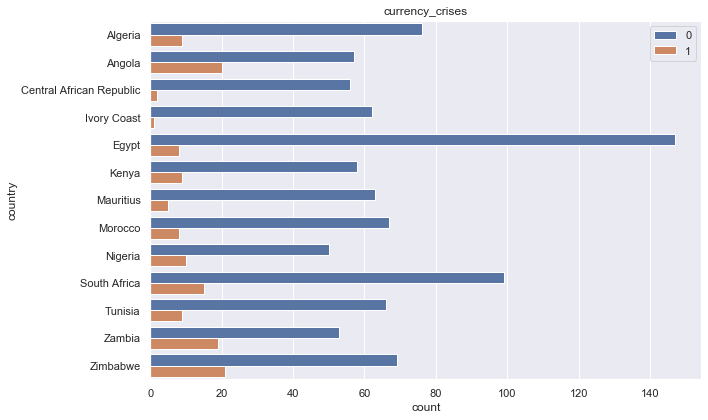

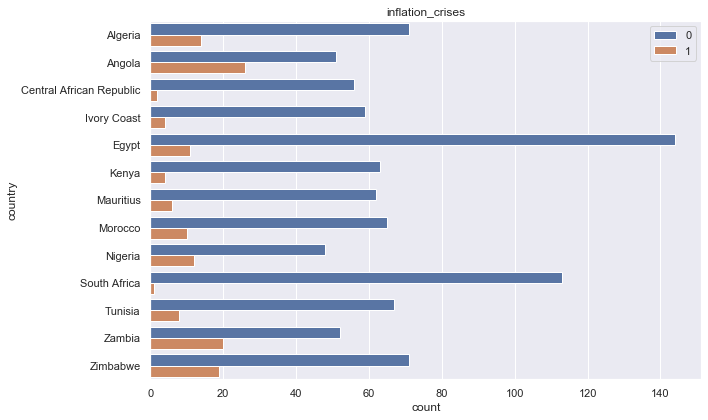

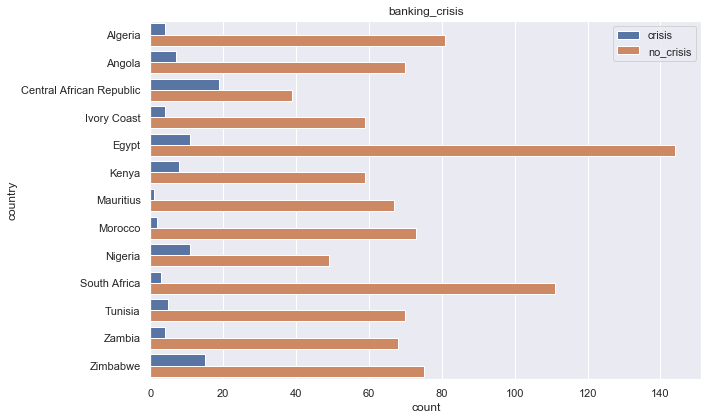

In [27]:
sns.set(style='darkgrid')
cols=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.rcParams['figure.figsize'] = (10,6)
for col in cols:
    sns.countplot(y=africa_data.country,hue=africa_data[col])
    plt.legend(loc=0)
    plt.title(col)
    plt.tight_layout()
    plt.savefig(f'type_crisis_total_{col}.png')
    plt.show()

## The Data Set doesn't have analysis with correlation

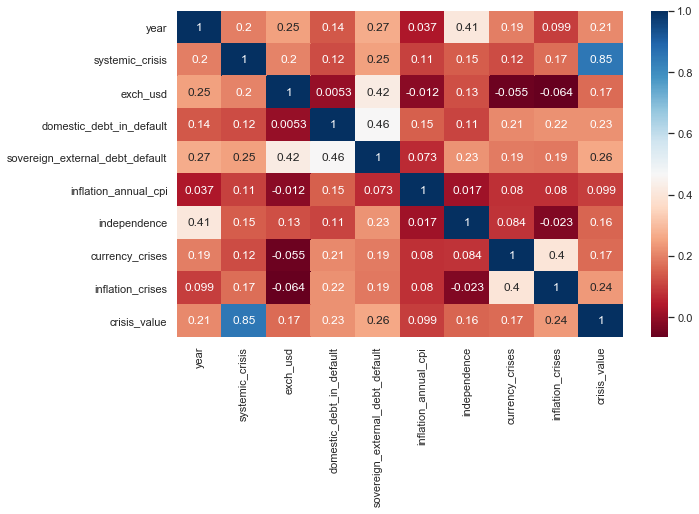

In [28]:
# Correlation Matrix
correlation_matrix = africa_data.corr()
# Heatmap
sns.heatmap(correlation_matrix, cmap='RdBu', annot = True)
plt.savefig(f'correlation_matrix.png')
plt.show()